# **Salomon Uran Parra C.C. 1015068767**

## **Análisis de datos con pandas.**

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import scipy.stats as ss

### **1. Leer los datos desde una página web.**

Al entrar a la web del dataset, se sugiere importar los datos desde una librería de la Universidad de California:


```
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
datos = fetch_ucirepo(id=17)

#data (as pandas dataframes)
x = datos.data.features
y = datos.data.targets
```

Sin embargo, de esta librería se puede obtener el link al csv con los datos directamente:


In [143]:
x = pd.read_csv('https://archive.ics.uci.edu/static/public/17/data.csv')
#el link se obtuvo por medio de la libreria de la universidad de california

x.drop(columns = 'ID',inplace = True)
#se elimino la fila con los ID de los pacientes

x = x[x.columns.tolist()[::-1]]
#se puso de primera la columna con el diagnostico

x.head(1)

,Diagnosis,fractal_dimension3,symmetry3,concave_points3,concavity3,compactness3,smoothness3,area3,perimeter3,texture3,...,fractal_dimension1,symmetry1,concave_points1,concavity1,compactness1,smoothness1,area1,perimeter1,texture1,radius1
0,M,0.1189,0.4601,0.2654,0.7119,0.6656,0.1622,2019.0,184.6,17.33,...,0.07871,0.2419,0.1471,0.3001,0.2776,0.1184,1001.0,122.8,10.38,17.99


### **2. Renombrar las columnas en formato PascalCase.**

El formato PascalCase para los títulos de las columnas se puede emplear haciendo splitting y capitalize de los nombres de cada columna. Primero miremos como lucen los nombres:

In [144]:
x.columns

Index(['Diagnosis', 'fractal_dimension3', 'symmetry3', 'concave_points3',
       'concavity3', 'compactness3', 'smoothness3', 'area3', 'perimeter3',
       'texture3', 'radius3', 'fractal_dimension2', 'symmetry2',
       'concave_points2', 'concavity2', 'compactness2', 'smoothness2', 'area2',
       'perimeter2', 'texture2', 'radius2', 'fractal_dimension1', 'symmetry1',
       'concave_points1', 'concavity1', 'compactness1', 'smoothness1', 'area1',
       'perimeter1', 'texture1', 'radius1'],
      dtype='object')

Podemos observar que la mayoría de títulos empiezan con minúscula y que cuando son nombres que consisten en 2 palabras, estas están separadas por un barra baja (_), así, el código seria:

In [145]:
col = x.columns.tolist()
ncol = []
#se sacan los nombres actuales de las columnas

for i in col:
  t = i.split('_')
  #para cada nombre se sacan las palabras que lo componen (los numeros son irrelevantes)

  t = [j.capitalize() for j in t]
  #para cada palabra del titulo, se pone la primera letra en mayuscula

  sr = ''
  for k in t:
    sr += k
  #se toman las palabras del titulo ya capitalizadas y se juntan en un unico string sin separacion

  ncol.append(sr)

mapa = dict(zip(col, ncol))
#se crea un diccionario que mapea los titulos antiguos con los nuevos

x = x.rename(mapper = mapa, axis = 'columns')
#se aplica este cambio de titulos al dataframe

x.head(1)

,Diagnosis,FractalDimension3,Symmetry3,ConcavePoints3,Concavity3,Compactness3,Smoothness3,Area3,Perimeter3,Texture3,...,FractalDimension1,Symmetry1,ConcavePoints1,Concavity1,Compactness1,Smoothness1,Area1,Perimeter1,Texture1,Radius1
0,M,0.1189,0.4601,0.2654,0.7119,0.6656,0.1622,2019.0,184.6,17.33,...,0.07871,0.2419,0.1471,0.3001,0.2776,0.1184,1001.0,122.8,10.38,17.99


### **3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.**

In [146]:
display(x.head(1))
display(x.tail(1))

,Diagnosis,FractalDimension3,Symmetry3,ConcavePoints3,Concavity3,Compactness3,Smoothness3,Area3,Perimeter3,Texture3,...,FractalDimension1,Symmetry1,ConcavePoints1,Concavity1,Compactness1,Smoothness1,Area1,Perimeter1,Texture1,Radius1
0,M,0.1189,0.4601,0.2654,0.7119,0.6656,0.1622,2019.0,184.6,17.33,...,0.07871,0.2419,0.1471,0.3001,0.2776,0.1184,1001.0,122.8,10.38,17.99


,Diagnosis,FractalDimension3,Symmetry3,ConcavePoints3,Concavity3,Compactness3,Smoothness3,Area3,Perimeter3,Texture3,...,FractalDimension1,Symmetry1,ConcavePoints1,Concavity1,Compactness1,Smoothness1,Area1,Perimeter1,Texture1,Radius1
568,B,0.07039,0.2871,0.0,0.0,0.06444,0.08996,268.6,59.16,30.37,...,0.05884,0.1587,0.0,0.0,0.04362,0.05263,181.0,47.92,24.54,7.76


Usando head() y tail() podemos ver que el dataframe tiene 569 registros de pacientes con un diagnóstico y datos numéricos sobre diversas características del diagnóstico.

In [147]:
x.describe()

,FractalDimension3,Symmetry3,ConcavePoints3,Concavity3,Compactness3,Smoothness3,Area3,Perimeter3,Texture3,Radius3,...,FractalDimension1,Symmetry1,ConcavePoints1,Concavity1,Compactness1,Smoothness1,Area1,Perimeter1,Texture1,Radius1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.083946,0.290076,0.114606,0.272188,0.254265,0.132369,880.583128,107.261213,25.677223,16.269190,...,0.062798,0.181162,0.048919,0.088799,0.104341,0.096360,654.889104,91.969033,19.289649,14.127292
std,0.018061,0.061867,0.065732,0.208624,0.157336,0.022832,569.356993,33.602542,6.146258,4.833242,...,0.007060,0.027414,0.038803,0.079720,0.052813,0.014064,351.914129,24.298981,4.301036,3.524049
min,0.055040,0.156500,0.000000,0.000000,0.027290,0.071170,185.200000,50.410000,12.020000,7.930000,...,0.049960,0.106000,0.000000,0.000000,0.019380,0.052630,143.500000,43.790000,9.710000,6.981000
25%,0.071460,0.250400,0.064930,0.114500,0.147200,0.116600,515.300000,84.110000,21.080000,13.010000,...,0.057700,0.161900,0.020310,0.029560,0.064920,0.086370,420.300000,75.170000,16.170000,11.700000
50%,0.080040,0.282200,0.099930,0.226700,0.211900,0.131300,686.500000,97.660000,25.410000,14.970000,...,0.061540,0.179200,0.033500,0.061540,0.092630,0.095870,551.100000,86.240000,18.840000,13.370000
75%,0.092080,0.317900,0.161400,0.382900,0.339100,0.146000,1084.000000,125.400000,29.720000,18.790000,...,0.066120,0.195700,0.074000,0.130700,0.130400,0.105300,782.700000,104.100000,21.800000,15.780000
max,0.207500,0.663800,0.291000,1.252000,1.058000,0.222600,4254.000000,251.200000,49.540000,36.040000,...,0.097440,0.304000,0.201200,0.426800,0.345400,0.163400,2501.000000,188.500000,39.280000,28.110000


Por medio de describe(), podemos ver que hay un total de 30 columnas con datos numéricos (características) de cada registro, a los cuales es posible asignarles media, desviación y cuartiles, además de obtener los máximos y mínimos.

In [148]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Diagnosis          569 non-null    object 
 1   FractalDimension3  569 non-null    float64
 2   Symmetry3          569 non-null    float64
 3   ConcavePoints3     569 non-null    float64
 4   Concavity3         569 non-null    float64
 5   Compactness3       569 non-null    float64
 6   Smoothness3        569 non-null    float64
 7   Area3              569 non-null    float64
 8   Perimeter3         569 non-null    float64
 9   Texture3           569 non-null    float64
 10  Radius3            569 non-null    float64
 11  FractalDimension2  569 non-null    float64
 12  Symmetry2          569 non-null    float64
 13  ConcavePoints2     569 non-null    float64
 14  Concavity2         569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Smoothness2        569 non

De info() podemos ver las 30 columnas numéricas más el diagnostico (columna 0), también vemos que, de los 569 registros, ninguna columna tiene datos nulos. Además, los datos numéricos son tipo float64. El uso en memoria es de 137 KB.

### **4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`. Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?**

De antes ya supimos que no hay registros con valores nulos. Sin embargo, usando isnull().sum() se puede obtener la cantidad de valores nulos para cada una de las columnas. En caso de que hubiera valores nulos, se puede optar por eliminar dicho registro o reemplazar el valor nulo por la media de dicha columna (obtenida antes con describe()).

In [149]:
x.isnull().sum()

Diagnosis            0
FractalDimension3    0
Symmetry3            0
ConcavePoints3       0
Concavity3           0
Compactness3         0
Smoothness3          0
Area3                0
Perimeter3           0
Texture3             0
Radius3              0
FractalDimension2    0
Symmetry2            0
ConcavePoints2       0
Concavity2           0
Compactness2         0
Smoothness2          0
Area2                0
Perimeter2           0
Texture2             0
Radius2              0
FractalDimension1    0
Symmetry1            0
ConcavePoints1       0
Concavity1           0
Compactness1         0
Smoothness1          0
Area1                0
Perimeter1           0
Texture1             0
Radius1              0
dtype: int64

### **5. Identificar los valores únicos en la columna `Diagnosis` que representan las etiquetas B y M (Benigno y Maligno, respectivamente). Utiliza el método `unique()` para mostrar estos valores.**

In [150]:
x['Diagnosis'].unique().tolist()

['M', 'B']

### **6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:**

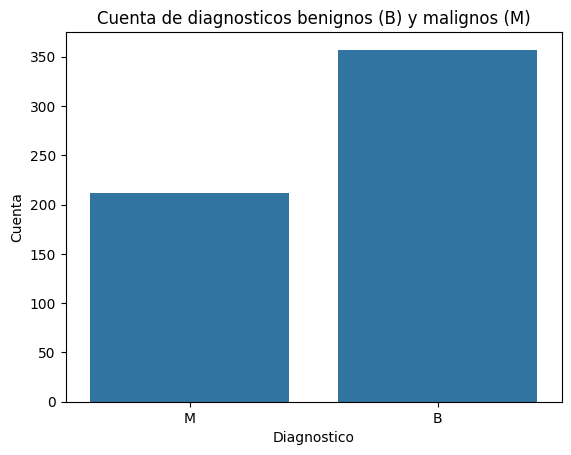

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [151]:
sns.countplot(x='Diagnosis', data=x)


plt.title('Cuenta de diagnosticos benignos (B) y malignos (M)')
plt.xlabel('Diagnostico')
plt.ylabel('Cuenta')
plt.show()

x['Diagnosis'].value_counts()

### **7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).**

In [152]:
numer = x['Diagnosis']=='M'
#obtengo una serie con los registros del dataframe que cumplen la condicion de que el diagnostico sea M

dc = {True : 1, False : 0}
#creo un diccionario que mapee la condicion True a 1 y False a 0

remp = numer.map(dc)
#mapeo la serie de booleanos a los valores correspondientes del diccionario

x.insert(loc = 1, column = 'DiagnosisNumeric',value = remp)
#inserto en la posicion siguiente a la columna diagnosis (pos 0) a columna nueva pedida

display(x.head(1))
display(x.tail(1))

,Diagnosis,DiagnosisNumeric,FractalDimension3,Symmetry3,ConcavePoints3,Concavity3,Compactness3,Smoothness3,Area3,Perimeter3,...,FractalDimension1,Symmetry1,ConcavePoints1,Concavity1,Compactness1,Smoothness1,Area1,Perimeter1,Texture1,Radius1
0,M,1,0.1189,0.4601,0.2654,0.7119,0.6656,0.1622,2019.0,184.6,...,0.07871,0.2419,0.1471,0.3001,0.2776,0.1184,1001.0,122.8,10.38,17.99


,Diagnosis,DiagnosisNumeric,FractalDimension3,Symmetry3,ConcavePoints3,Concavity3,Compactness3,Smoothness3,Area3,Perimeter3,...,FractalDimension1,Symmetry1,ConcavePoints1,Concavity1,Compactness1,Smoothness1,Area1,Perimeter1,Texture1,Radius1
568,B,0,0.07039,0.2871,0.0,0.0,0.06444,0.08996,268.6,59.16,...,0.05884,0.1587,0.0,0.0,0.04362,0.05263,181.0,47.92,24.54,7.76


### **8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:**
   `(x - mean(x)) / std(x)`

In [153]:
cols = x.columns
#obtengo las columnas

for i in range(2,len(cols)):
  #para las columnas numericas

  x[cols[i]] = (x[cols[i]]-x[cols[i]].mean())/(x[cols[i]].std())
  #se aplica la formula

x.head(1)

,Diagnosis,DiagnosisNumeric,FractalDimension3,Symmetry3,ConcavePoints3,Concavity3,Compactness3,Smoothness3,Area3,Perimeter3,...,FractalDimension1,Symmetry1,ConcavePoints1,Concavity1,Compactness1,Smoothness1,Area1,Perimeter1,Texture1,Radius1
0,M,1,1.935312,2.748204,2.294058,2.107672,2.614365,1.306537,1.999478,2.301575,...,2.253764,2.215566,2.530249,2.650542,3.280628,1.567087,0.98351,1.268817,-2.071512,1.0961


### **9. Agrupar características similares y calcular su promedio.**

Para las siguientes características:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

In [154]:
cols = x.columns.tolist()
#obtengo columnas

ucols = [re.match(r'^[a-zA-Z_]+', i).group(0) for i in cols[2:]]
#obtengo las iniciales (sin numero) de las columnas numericas

ucols = list(set(ucols))
#lo transformo en lista con valores unicos de cada inicial (recordar que radius1, radius2, radius3 van a repetir 3 veces radius en la lista anterior)

for i in ucols:
  #itero sobre las iniciales
  columnas = []
  for j in cols[2:]:
    #itero sobre las columnas numericas
    if j.startswith(i):
      columnas.append(j)
      #creo la lista en donde van las columnas que comparten inicial

  x[i+'Mean'] = x[columnas].mean(axis=1)
  #creo una nueva columna con inicial y Mean, que sea el promedio de las columnas que comparten inicial, para cada registro

  x.drop(columns = columnas,inplace = True)
  #elimino las columnas que no sean un promedio

x.head(1)

,Diagnosis,DiagnosisNumeric,SymmetryMean,ConcavePointsMean,SmoothnessMean,ConcavityMean,AreaMean,TextureMean,RadiusMean,CompactnessMean,PerimeterMean,FractalDimensionMean
0,M,1,2.037172,1.828182,0.886604,1.827201,1.822793,-1.33146,1.822892,2.403566,2.133644,1.698454


### **10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.**

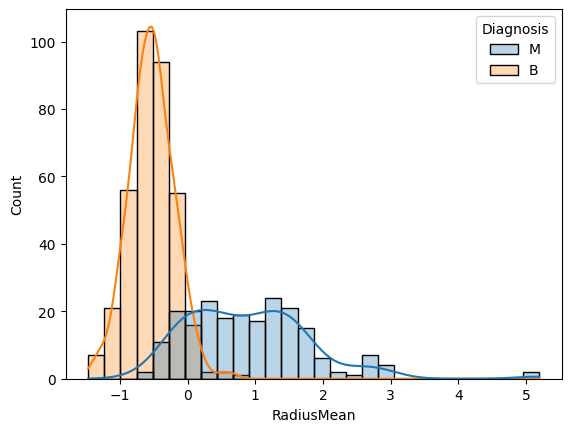

In [155]:
sns.histplot(data = x, x = 'RadiusMean', hue = 'Diagnosis', kde = True,alpha = 0.3)
plt.show()

### **11. Generar gráficos de violín para múltiples características.**



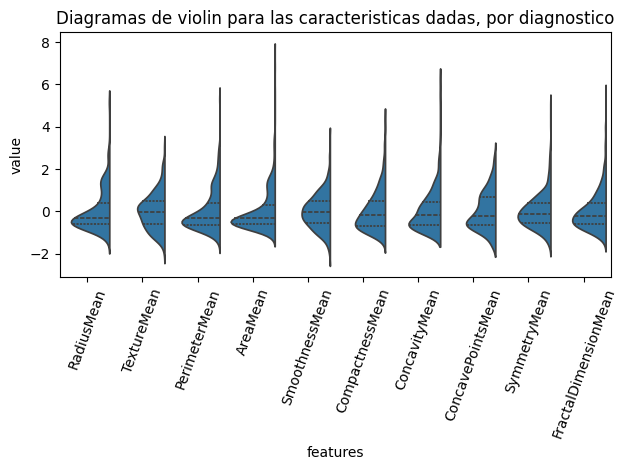

In [156]:
cols = [
    'RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean',
    'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean',
    'SymmetryMean', 'FractalDimensionMean'
]
#lista de columnas pedidas


data = pd.melt(x, id_vars="Diagnosis", value_vars=cols, var_name="features", value_name="value")
#se crea un dataframe con las columnas del dataframe como registros que responden a un nombre de variable feature y su valor value

sns.violinplot(x="features", y="value",  data=data, split=True, inner="quart")
#crear el grafico de violin

plt.xticks(rotation=70)
plt.title('Diagramas de violin para las caracteristicas dadas, por diagnostico')
plt.tight_layout()
plt.show()

### **12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.**

A partir de aquí se mostraran los boxplots y la eliminación de los outliers:

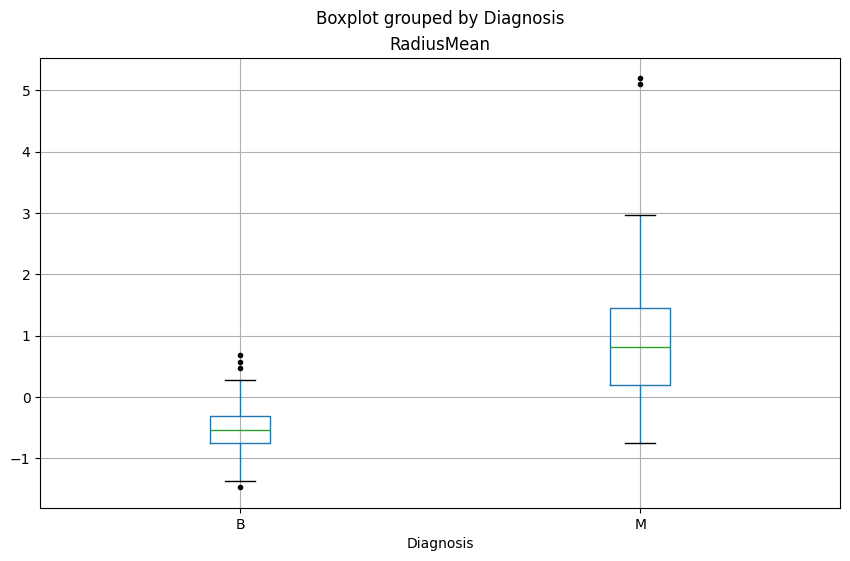

In [157]:
x.boxplot(column="RadiusMean", by = 'Diagnosis', sym = 'k.', figsize=(10,6))
plt.show()

Al parecer hay 4 outliers para el diagnostico B y 2 outliers para M. Se excluiran usando el rango intercuartilico IQR de la siguiente forma:

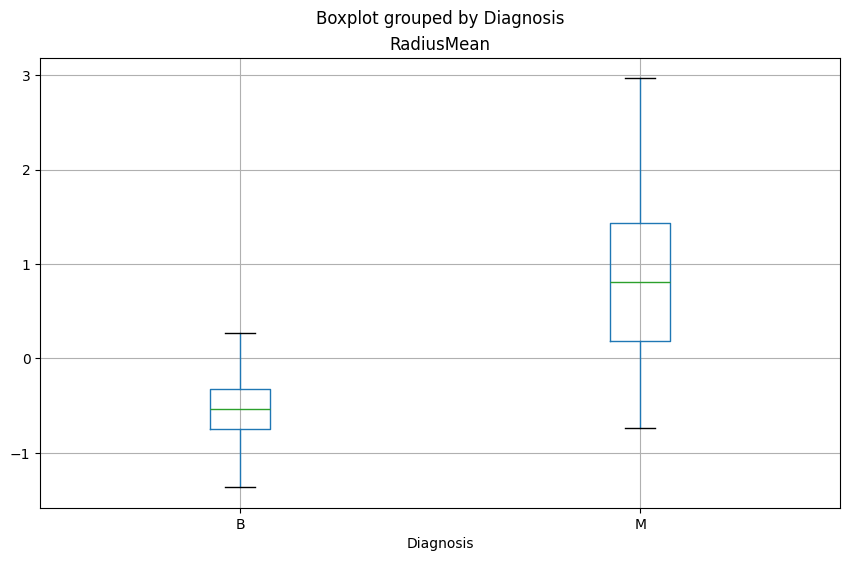

In [158]:
x_m = x[x['Diagnosis'] == 'M'].copy()
x_b = x[x['Diagnosis'] == 'B'].copy()
#se toma los datos con diagnostico B y M por separado, pues tienen distintos rangos y outliers

Q1_m = x_m['RadiusMean'].quantile(0.25)
Q3_m = x_m['RadiusMean'].quantile(0.75)
IQR_m = Q3_m - Q1_m

Q1_b = x_b['RadiusMean'].quantile(0.25)
Q3_b = x_b['RadiusMean'].quantile(0.75)
IQR_b = Q3_b - Q1_b

#se definen los rangos intercuartilicos tanto para los datos con M como con B


x_m_limpio = x_m[~((x_m['RadiusMean'] < (Q1_m - 1.5 * IQR_m)) | (x_m['RadiusMean'] > (Q3_m + 1.5 * IQR_m)))]

x_b_limpio = x_b[~((x_b['RadiusMean'] < (Q1_b - 1.5 * IQR_b)) | (x_b['RadiusMean'] > (Q3_b + 1.5 * IQR_b)))]
#se quitan los outliers con la condicion de que los valores vivan en el rango intercuartilico mas 1.5*IQR (los bigotes del diagrama de caja)

x_limpio = pd.concat([x_m_limpio, x_b_limpio])
#se usa concat() para juntar los datos con M y B ya limpios

x_limpio.boxplot(column="RadiusMean", by = 'Diagnosis', sym='k.', figsize=(10,6))
#se plotean los diagramas de caja nuevamente
plt.show()

### **13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.**



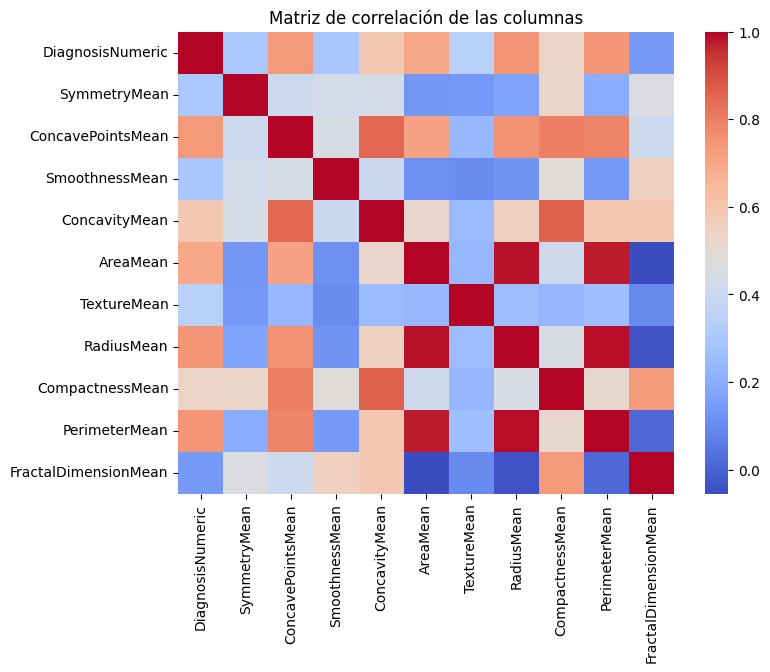

In [159]:
matriz = x.corr(numeric_only=True)
#se sacan los coeficientes de correlacion para todas las columnas que sean numericas


plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=False, cmap='coolwarm')
#se plotea el mapa de calor

plt.title('Matriz de correlación de las columnas')
plt.show()

### **14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?**

Podrían realizarse gráficos de dispersión para analizar la correlación particular entre par de columnas, en especial diferenciando entre los diagnósticos benignos y malignos. También para este propósito serian útiles los histogramas entre benignos y malignos (que ya se realizaron con los diagramas de violín). Esto permitiría saber qué características se ven más o menos afectadas debido a la detección de la enfermedad.

Si se desea hacer esto a la vez, se puede usar los gráficos de pares o pairplot de seaborn, que permite hacer esto a la vez para múltiples columnas. En la diagonal arroja un histograma tipo kde para la columna.


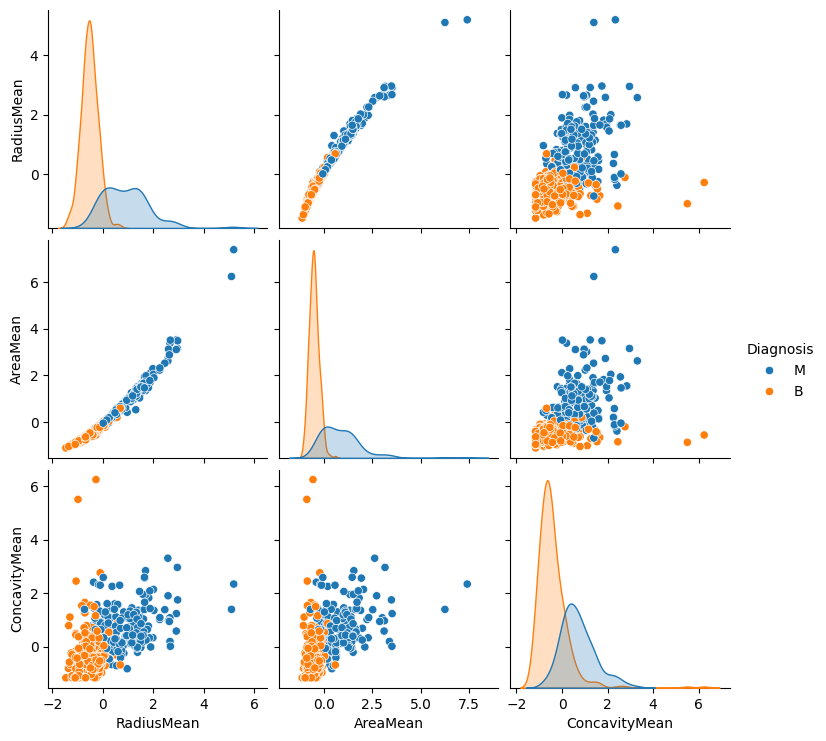

<Figure size 1000x600 with 0 Axes>

In [160]:
sns.pairplot(data = x, vars = ['RadiusMean','AreaMean','ConcavityMean'], hue = 'Diagnosis')
plt.figure(figsize = (10,6))
plt.show()

Por ejemplo, de acá podemos observar que hay una fuerte correlación entre el radio y el área promedio. Esto podría servir para reducir los datos pues se puede decir que el radio es representativo del área y viceversa.